# 신용카드 거래사기 탐지

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Library

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

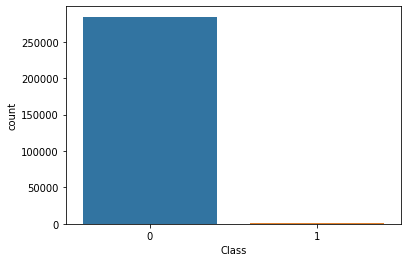

In [4]:
# Target Class 분포
sns.countplot(x='Class', data=df);

In [5]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [6]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

X.shape, Y.shape

((284807, 30), (284807,))

In [7]:
# 피처 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:, :] = scaler.fit_transform(X)

X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-3.065637e-16,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,5.588401e-18,-4.311052e-17,1.676520e-17,-1.252401e-17,2.594615e-17,-2.075692e-17,1.836189e-17,3.392958e-18,2.634532e-17,4.365938e-18,-1.247411e-18,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,-4.700128e+00,-1.869868e+01,-5.819392e+00,-2.004428e+01,-4.915191e+00,-1.612534e+01,-2.962645e+01,-1.133266e+01,-8.861402e+00,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,-7.470224e-01,-4.058964e-01,-6.516198e-01,-4.439565e-01,-6.368132e-01,-5.341353e-01,-5.695609e-01,-5.951621e-01,-5.605369e-01,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,-3.209268e-02,1.401448e-01,-1.363250e-02,5.278702e-02,5.251917e-02,7.579255e-02,-7.732604e-02,-4.338370e-03,4.588014e-03,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,7.245863e-01,6.187332e-01,6.656518e-01,5.144513e-01,7.088502e-01,5.971989e-01,4.705737e-01,5.974968e-01,5.637928e-01,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,1.177504e+01,7.854679e+00,7.160735e+00,1.098147e+01,9.699117e+00,1.976044e+01,1.089502e+01,6.014342e+00,6.869414e+00,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [8]:
# 데이터 분리
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.6, 
                                                    stratify=Y, 
                                                    random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(113922, 30) (113922,)
(170885, 30) (170885,)


# EDA

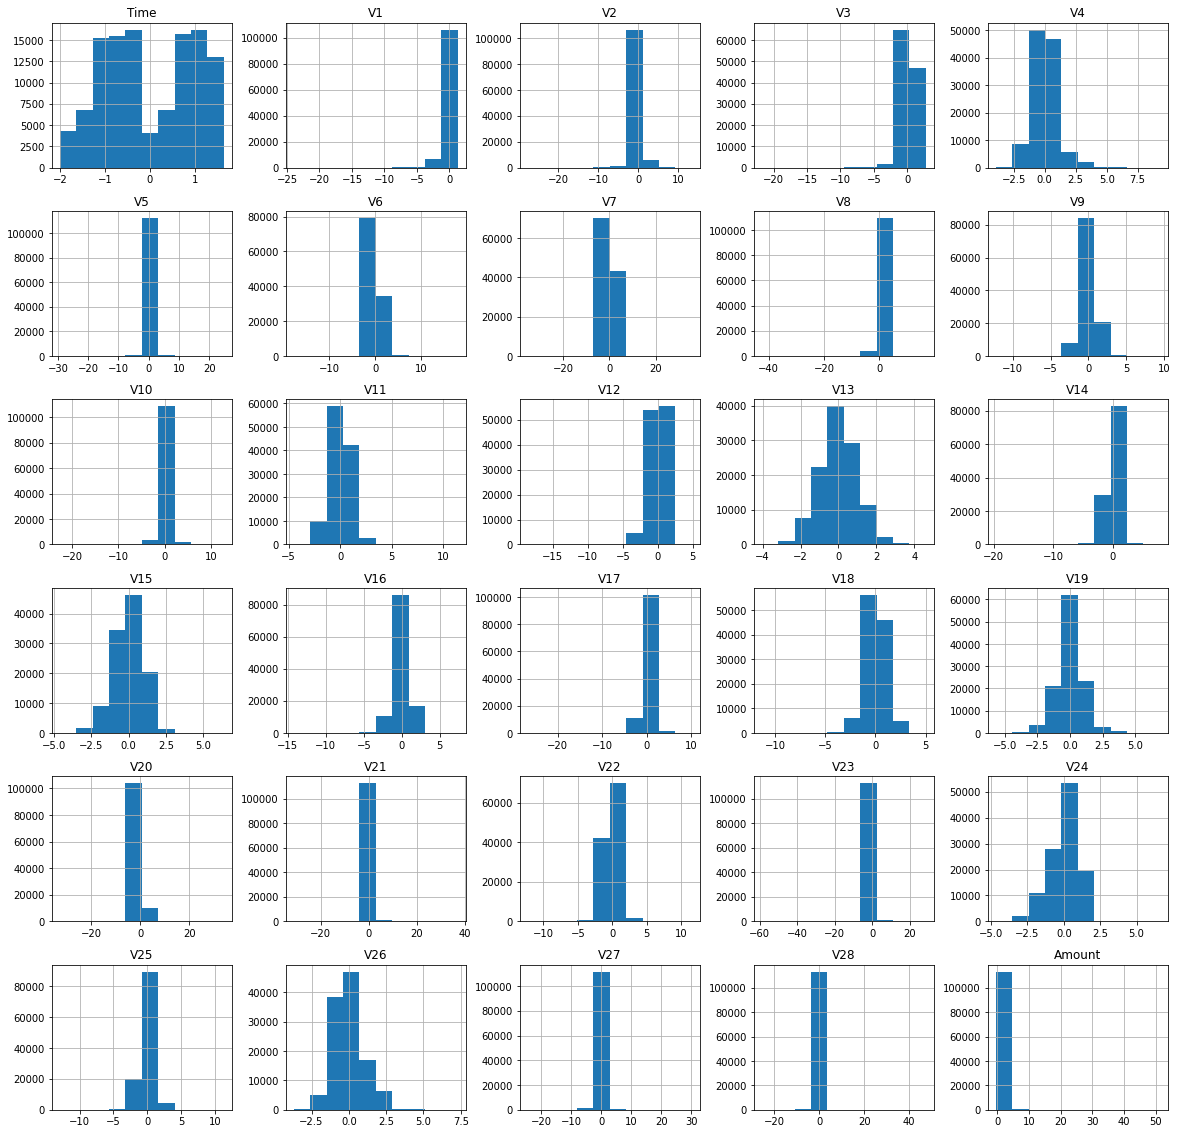

In [61]:
X_train.hist(figsize = (20, 20))
plt.show()

# 상관관계

In [11]:
X_train.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.120226,-0.010848,-0.421743,-0.106097,0.177258,-0.066135,0.085560,-0.037474,-0.011023,0.027573,-0.252432,0.124453,-0.065502,-0.101867,-0.181780,0.011555,-0.079681,0.089363,0.032760,-0.053736,0.046609,0.142573,0.052885,-0.020810,-0.234839,-0.043187,-0.006404,-0.010502,-0.012919
V1,0.120226,1.000000,-0.021635,-0.013187,0.009454,-0.004003,-0.003090,0.001146,-0.003795,-0.005428,-0.009389,0.002355,-0.002475,0.002630,-0.002387,0.004621,0.002676,-0.010514,-0.003837,0.004950,-0.011380,-0.013491,0.005769,0.009424,-0.003121,0.007502,0.003120,0.011642,0.007771,-0.219803
V2,-0.010848,-0.021635,1.000000,-0.013116,0.006575,0.001731,-0.003801,0.009635,-0.005440,0.009620,0.007604,-0.001149,0.002813,0.001155,0.009672,0.004556,0.009397,0.005401,0.000125,-0.001574,0.003774,0.008859,-0.008225,0.021066,0.002086,0.006227,0.000032,0.007228,0.022610,-0.524067
V3,-0.421743,-0.013187,-0.013116,1.000000,0.008274,-0.018256,0.006518,0.005282,-0.007987,-0.003065,-0.013493,0.008598,-0.008989,-0.002068,-0.007559,0.002164,-0.005896,-0.014245,-0.007107,0.000357,-0.009938,-0.007582,0.002322,-0.004168,0.004594,0.001456,0.001246,0.020212,-0.006906,-0.195431
V4,-0.106097,0.009454,0.006575,0.008274,1.000000,0.001894,0.002785,0.006849,0.002592,0.001399,0.002623,0.000261,0.007047,-0.002887,0.003480,0.000342,0.001229,0.008797,0.003183,0.003826,-0.005924,-0.001843,-0.000438,-0.003105,0.000248,-0.001242,-0.000958,-0.006278,0.001405,0.091216
V5,0.177258,-0.004003,0.001731,-0.018256,0.001894,1.000000,0.020799,0.032443,-0.003780,-0.002267,-0.012856,0.005014,-0.007046,0.001042,-0.008668,0.004482,-0.000411,-0.007606,-0.003353,0.000737,-0.028118,-0.016910,0.002906,-0.023104,0.000053,-0.009122,-0.000305,0.034703,-0.040161,-0.378563
V6,-0.066135,-0.003090,-0.003801,0.006518,0.002785,0.020799,1.000000,-0.026294,0.004980,0.001357,0.002488,-0.000049,-0.000438,-0.001507,0.001537,-0.002588,-0.008533,-0.002467,0.002682,-0.000631,0.019526,0.012961,-0.002801,0.017100,0.001118,0.005959,-0.001697,-0.020008,0.024546,0.210570
V7,0.085560,0.001146,0.009635,0.005282,0.006849,0.032443,-0.026294,1.000000,0.005909,-0.006956,-0.011032,0.003809,-0.009844,-0.006385,-0.006638,-0.002921,-0.018057,-0.019111,-0.003233,-0.000553,0.037756,-0.001721,-0.000988,0.012416,-0.000986,0.001711,-0.006017,-0.030447,0.028408,0.385839
V8,-0.037474,-0.003795,-0.005440,-0.007987,0.002592,-0.003780,0.004980,0.005909,1.000000,0.000963,-0.008191,0.003793,0.004075,-0.003087,0.000910,-0.001041,-0.000297,0.006522,0.002627,-0.001953,0.002465,-0.041564,0.012822,-0.016574,0.002072,-0.000396,-0.001694,0.011281,-0.009410,-0.094773
V9,-0.011023,-0.005428,0.009620,-0.003065,0.001399,-0.002267,0.001357,-0.006956,0.000963,1.000000,0.004389,0.004715,-0.003619,0.004362,-0.003447,-0.003470,-0.005434,-0.008548,-0.004061,-0.000898,0.001565,0.003833,-0.002128,-0.009851,0.003084,-0.000990,0.004106,0.005526,-0.009877,-0.049828


In [12]:
# mask 
mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool))
# print(mask)

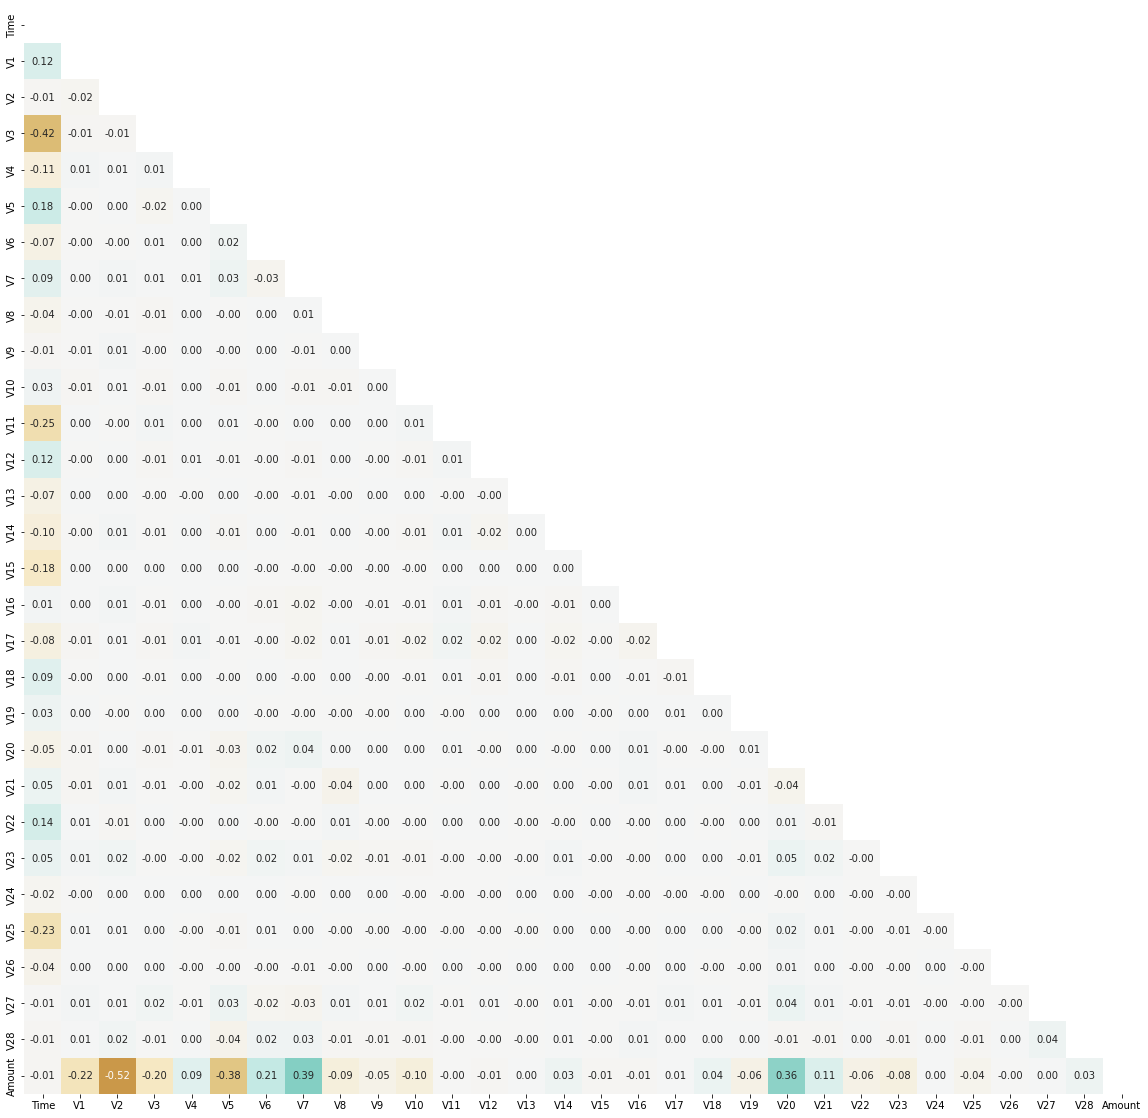

In [13]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X_train.corr(), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="BrBG", 
            fmt='.2f',
            cbar = False)
plt.show()

# 군집 분석 - clustering

### k-Means

In [14]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)   

KMeans(n_clusters=5)

In [15]:
clusters = kmeans.labels_  
clusters

array([1, 2, 1, ..., 4, 4, 4])

In [16]:
# 클래스 레이블과 비교
df_cluster = pd.DataFrame()
df_cluster['Class'] = y_train
df_cluster['Cluster'] = clusters
df_cluster = df_cluster.reset_index()

df_cluster.groupby(['Class', 'Cluster']).count()

index
Class Cluster       
0     0         7906
      1        16001
      2        38549
      3         6581
      4        44688
1     0           53
      1            3
      2           54
      4           87

In [17]:
# Test 데이터셋에 적용
df_test_cluster = pd.DataFrame()
df_test_cluster['Class'] = y_test
df_test_cluster['Cluster'] = kmeans.predict(X_test)
df_test_cluster = df_test_cluster.reset_index()

df_test_cluster.groupby(['Class', 'Cluster']).count()

index
Class Cluster       
0     0        11841
      1        23826
      2        58146
      3         9932
      4        66845
1     0           74
      1            2
      2           94
      4          125

### GMM

In [18]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)  

GaussianMixture(n_components=2)

In [19]:
clusters = gmm.predict(X_train)
clusters

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [20]:
# 클래스 레이블과 비교
df_cluster = pd.DataFrame()
df_cluster['Class'] = y_train
df_cluster['Cluster'] = clusters
df_cluster = df_cluster.reset_index()

df_cluster.groupby(['Class', 'Cluster']).count()

index
Class Cluster       
0     0        71536
      1        42189
1     0           15
      1          182

In [21]:
# Test 데이터셋에 적용
df_test_cluster = pd.DataFrame()
df_test_cluster['Class'] = y_test
df_test_cluster['Cluster'] = gmm.predict(X_test)
df_test_cluster = df_test_cluster.reset_index()

df_test_cluster.groupby(['Class', 'Cluster']).count()

index
Class Cluster        
0     0        107443
      1         63147
1     0            36
      1           259

### DBSCAN

In [22]:
dbscan = DBSCAN(eps=0.001, min_samples=10)
dbscan.fit(X_train)  

DBSCAN(eps=0.001, min_samples=10)

In [23]:
clusters = dbscan.labels_  
clusters

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [24]:
# 클래스 레이블과 비교
df_cluster = pd.DataFrame()
df_cluster['Class'] = y_train
df_cluster['Cluster'] = clusters
df_cluster = df_cluster.reset_index()

df_cluster.groupby(['Class', 'Cluster']).count()

index
Class Cluster        
0     -1       113674
       0           21
       1           19
       2           11
1     -1          197

# 차원 축소

### 주성분 분석 (PCA)

In [25]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49165,-1.071256,0.401639,-1.239527,0.307517,-0.737689,-1.414571,-0.369761,-0.526875,-0.156744,-1.745010,1.093918,0.211256,-0.244224,1.257429,-0.420920,1.031567,-0.646065,0.929965,-0.788240,-1.023190,0.475678,-0.146333,-0.900681,-0.089552,0.647326,-0.159843,-0.910862,0.002894,0.272569,1.044901
278807,1.550603,0.016777,0.442780,0.060609,-0.567151,0.435809,-0.409501,0.682361,0.019640,-0.116035,-0.197881,0.179118,0.158893,-0.953476,0.491445,-1.052976,0.328085,-0.915871,0.024537,0.480228,-0.090392,-0.340537,-0.861209,0.023061,-0.868600,-0.935209,0.318291,0.584261,0.243715,-0.331800
68123,-0.883840,-0.462626,-0.663687,1.496323,-1.221787,-1.710584,0.335941,-1.083260,0.675511,-1.113869,0.242958,-0.034180,0.441936,0.258221,-1.315034,-3.804290,-0.891396,1.241391,0.441498,0.101549,-0.328499,-0.011894,0.568812,0.329441,0.897434,-0.778591,-0.691571,0.198197,0.224552,0.064371
226669,1.051467,-0.869066,-0.459826,0.192247,-0.825666,0.817845,-0.491295,-0.605368,-1.447969,-1.535613,0.722822,1.109411,0.061177,0.743264,0.092431,-0.019257,0.793965,0.363686,-0.675978,2.309934,-0.830007,2.524341,1.465431,0.391803,1.419631,0.881979,0.561540,1.308272,-0.178081,-0.293258
192278,0.732987,-0.014868,0.624853,-0.854100,-0.432695,1.302083,-0.790567,1.655661,-0.526339,-0.431581,-0.631479,-0.772895,-0.136735,0.561590,-1.251773,-0.803280,-0.314801,0.566887,-0.017846,-0.182886,0.372945,0.151863,0.913472,-0.200267,0.756321,-0.718046,1.044905,0.519092,0.275588,-0.089795


In [26]:
pca = PCA(n_components=3, random_state=20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

X_train_pca = pd.DataFrame(data=X_train_pca, index=X_train.index)
X_train_pca.head()

,0,1,2
49165,1.631243,-1.479044,0.263638
278807,-0.659170,1.574308,-0.411737
68123,0.247026,-0.587049,0.265803
226669,-0.701822,0.396618,2.807000
192278,-0.277576,1.973748,-0.520758


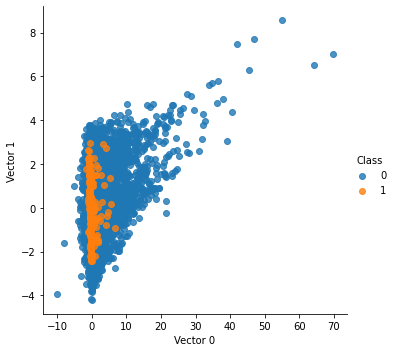

In [27]:
# 2개의 주성분으로 클래스 구분한 결과를 시각화
def plot_scatter(dfx, dfy, col1=0, col2=1):
    temp = pd.DataFrame(data=dfx.loc[:,[col1, col2]], index=dfx.index)
    temp = pd.concat((temp,dfy), axis=1, join="inner")
    temp.columns = [f"Vector {col1}", f"Vector {col2}", "Class"]
    sns.lmplot(x=f"Vector {col1}", y=f"Vector {col2}", hue="Class", 
               data=temp, fit_reg=False)
    
plot_scatter(X_train_pca, y_train, 0, 1)

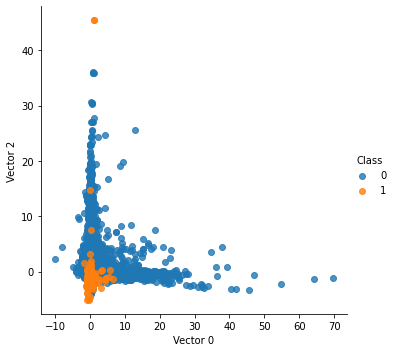

In [28]:
plot_scatter(X_train_pca, y_train, 0, 2)

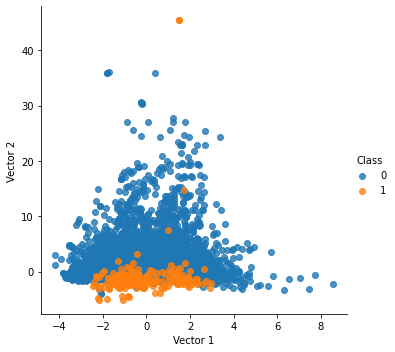

In [29]:
plot_scatter(X_train_pca, y_train, 1, 2)

### SVD

In [30]:
svd = TruncatedSVD(n_components=3, random_state=20)
svd.fit(X_train)
X_train_svd = svd.transform(X_train)

X_train_svd = pd.DataFrame(data=X_train_svd, index=X_train.index)
X_train_svd.head()

,0,1,2
49165,1.612827,-1.449961,0.245389
278807,-0.640807,1.581945,-0.390559
68123,0.263311,-0.523076,0.304083
226669,-0.686471,0.469864,2.808641
192278,-0.257193,1.957038,-0.505513


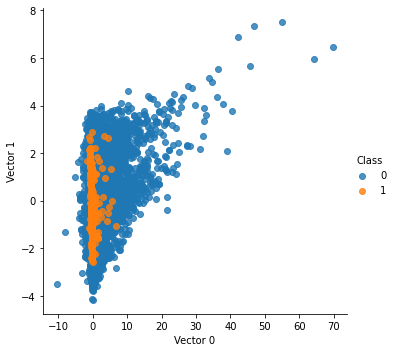

In [31]:
plot_scatter(X_train_svd, y_train, 0, 1)

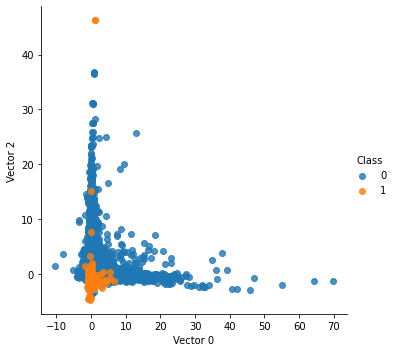

In [32]:
plot_scatter(X_train_svd, y_train, 0, 2)

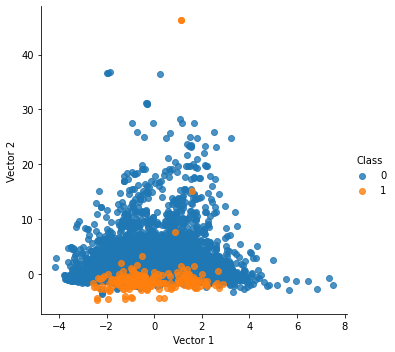

In [33]:
plot_scatter(X_train_svd, y_train, 1, 2)

In [56]:
y_train[1500:9000].value_counts()

0    7479
1      21
Name: Class, dtype: int64

### t-SNE

In [57]:
tsne = TSNE(n_components=3, random_state=20)

X_train_tsne = tsne.fit_transform(X_train[1500:9000])

X_train_tsne = pd.DataFrame(data=X_train_tsne, index=X_train[1500:9000].index)
X_train_tsne.head()

,0,1,2
273838,1.888726,5.818754,-23.800268
1588,-20.271893,9.188601,-6.939144
246417,15.974319,1.385915,17.396027
89945,-10.945091,-2.255603,7.297747
241977,6.521772,-18.297937,-17.973482


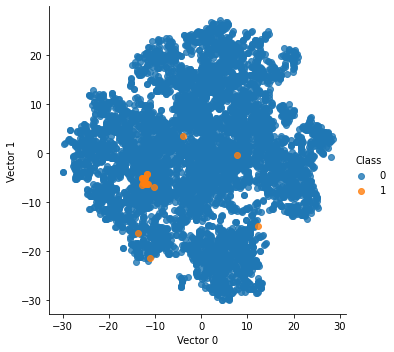

In [58]:
plot_scatter(X_train_tsne, y_train[1500:9000], 0, 1)

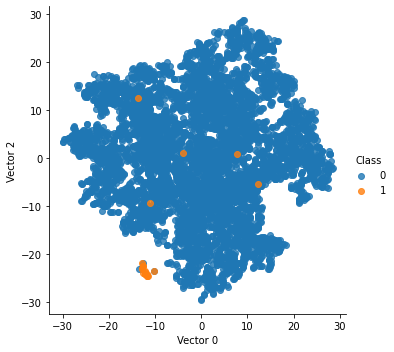

In [59]:
plot_scatter(X_train_tsne, y_train[1500:9000], 0, 2)

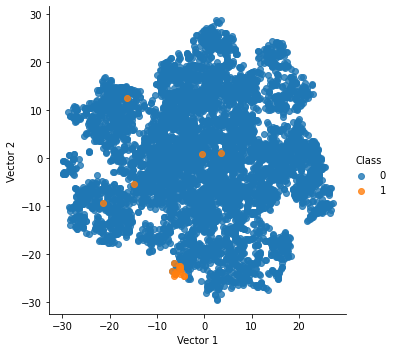

In [60]:
plot_scatter(X_train_tsne, y_train[1500:9000], 1, 2)

## 이상 탐지

In [38]:
# 원본 데이터를 재구성
X_train_inverse_pca = pca.inverse_transform(X_train_pca)
X_train_inverse_pca = pd.DataFrame(data=X_train_inverse_pca, index=X_train.index)
X_train_inverse_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
49165,-1.192283,-0.461189,-0.548119,0.520116,0.278761,-0.705981,0.341596,0.178325,-0.131136,-0.079422,-0.074719,0.432543,-0.142186,0.164036,0.234372,0.262061,-0.000351,0.134988,-0.103105,-0.082628,0.422953,0.228063,-0.385422,-0.155428,0.098201,0.398570,0.050411,-0.008977,0.043023,0.991937
278807,1.157822,0.302837,0.157891,-0.642905,-0.209706,0.438488,-0.216430,0.128988,0.142171,0.065722,-0.015096,-0.409141,0.111660,-0.196473,-0.217436,-0.252546,-0.023781,-0.120136,0.130335,0.015363,-0.115811,-0.221652,0.369988,0.124386,-0.108125,-0.435322,-0.045282,0.003660,-0.008310,-0.316825
68123,-0.435972,-0.129646,-0.048902,0.244842,0.074507,-0.174175,0.091551,-0.070924,-0.106143,-0.023613,0.027948,0.145727,-0.018105,0.087207,0.081961,0.085424,0.018939,0.043957,-0.052969,0.003722,0.012247,0.159557,-0.163192,-0.044372,0.043554,0.176544,0.015923,-0.007395,0.001765,0.111913
226669,0.336582,-0.208182,0.422629,-0.127067,-0.110720,0.016957,0.185963,-0.674047,-1.380759,-0.029471,0.499627,-0.415225,0.590821,0.348147,-0.091713,-0.256007,0.241140,-0.090511,-0.039220,0.291343,-0.951411,1.756303,-0.557759,-0.027939,0.076755,0.339096,-0.094937,-0.133959,-0.039086,-0.461593
192278,1.398485,0.277206,-0.018946,-0.857503,-0.215577,0.385306,-0.187721,0.313757,0.145721,0.068389,-0.061704,-0.497680,0.129451,-0.247650,-0.258473,-0.305342,-0.037816,-0.140766,0.174558,-0.011815,0.010151,-0.232301,0.427295,0.127903,-0.134330,-0.538327,-0.056476,-0.000831,0.008952,-0.014246


In [39]:
# 원본 데이터와 PCA 복원 데이터의 재구성 오차 계산

def anomaly_score(df_origin, df_recon):
    loss = np.sum((df_origin.values - df_recon.values)**2, axis=1)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

scores = anomaly_score(X_train, X_train_inverse_pca)
print(np.mean(scores))
scores

0.0032406976235171323


array([0.00168888, 0.00057564, 0.00434767, ..., 0.00100216, 0.00154655,
       0.00161853])

In [40]:
df_pca = pd.DataFrame()
df_pca['Class'] = y_train
df_pca['Score'] = scores
df_pca

,Class,Score
49165,0,0.001689
278807,0,0.000576
68123,0,0.004348
226669,0,0.002979
192278,0,0.001091
...,...,...
180163,0,0.000593
85388,0,0.000606
123440,0,0.001002
80604,0,0.001547


In [41]:
df_pca['Class'].value_counts()

0    113725
1       197
Name: Class, dtype: int64

In [42]:
df_pca.sort_values(by='Score', ascending=False).iloc[:300, 0].value_counts()

0    238
1     62
Name: Class, dtype: int64

## 테스트 데이터로 성능 평가

0.0006811348407300675


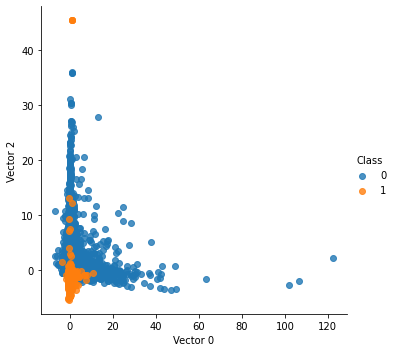

In [43]:
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(data=X_test_pca, index=X_test.index)

X_test_inverse_pca = pca.inverse_transform(X_test_pca)
X_test_inverse_pca = pd.DataFrame(data=X_test_inverse_pca, \
                                  index=X_test.index)

scores = anomaly_score(X_test, X_test_inverse_pca)
print(np.mean(scores))

plot_scatter(X_test_pca, y_test, 0, 2)

In [44]:
df_test_pca = pd.DataFrame()
df_test_pca['Class'] = y_test
df_test_pca['Score'] = scores
df_test_pca

,Class,Score
231388,0,0.000388
133393,0,0.000087
166857,0,0.000429
272030,0,0.000135
100317,0,0.001004
...,...,...
33875,0,0.000140
86347,0,0.000349
100724,0,0.000948
148391,0,0.000862


In [45]:
df_test_pca['Class'].value_counts()

0    170590
1       295
Name: Class, dtype: int64

In [46]:
df_test_pca.sort_values(by='Score', ascending=False).iloc[:500, 0].value_counts()

0    389
1    111
Name: Class, dtype: int64